In [1]:
%load_ext autoreload
%autoreload 2
from GeneticAlgorithm.individuo import Fenotype, SIZE
from GeneticAlgorithm.algorithm import GeneticAlgorithm
from EnfriamientoSimulado.algorithm import EnfriamientoSimulado
import random
import time
import ast
import matplotlib.pyplot as plt

In [2]:
numbersl = [random.randrange(1, 1000) for i in range(SIZE)]
numbersr = [random.randrange(1, 1000) for i in range(SIZE)]

In [5]:
print(numbersl)
print(numbersr)

[646, 797, 544, 265, 783, 164, 569, 976, 230, 651]
[238, 301, 40, 988, 445, 100, 191, 309, 662, 183]


In [2]:
numbersl = [646, 797, 544, 265, 783, 164, 569, 976, 230, 651]
numbersr = [238, 301, 40, 988, 445, 100, 191, 309, 662, 183]

## Genetic Algorithm

### Experiments

In [6]:
G = GeneticAlgorithm(lnumbers=numbersl, rnumbers=numbersr)

In [2]:
tests = []
for pop in [10, 30, 60, 100]:
    tests.append(
        (
            pop,
            pop // 2,
            pop // 2,
            10000,
            0.0,
            50,
            1,
            [1, 2],
            [0, 1, 2],
            0.1,
            1,
            pop // 5,
        )
    )

for stype in range(1, 4):
    tests.append((50, 20, 30, 10000, 0.0, 50, stype, [1, 2], [0, 1, 2], 0.1, 1, 10, 3))

for ctype in [[1, 2], [3, 4], [5]]:
    tests.append((30, 15, 15, 10000, 0.0, 50, 1, ctype, [0, 1, 2], 0.1, 1, 5))

for mtype in [0, 1, 2]:
    tests.append((30, 15, 15, 10000, 0.0, 50, 1, [1, 2], [mtype], 0.1, 1, 5))
for mprob in [0.05, 0.1, 0.2]:
    tests.append((30, 15, 15, 10000, 0.0, 50, 1, [1, 2], [0, 1, 2], mprob, 1, 5))
for rtype, rparam in [(1, 2), (2, 5), (3, 0.2)]:
    tests.append((30, 15, 15, 10000, 0.0, 50, 1, [1, 2], [0, 1, 2], 0.1, rtype, rparam))

In [8]:
"""run the genetic algorithm

Args:
    pquantity (int): population quantity
    squantity (int): selection quantity
    cquantity (int): children quantity
    max_iterations (int): max iterations
    condition_stop (float): condition to stop
    p_restart_iterations (int): iterations to restart
    selection_type (int): selection type
    cross_types (list): cross types
    mutation_types (list): mutation types
    mutation_probability (float): mutation probability
    replace_type (int): replace type
    replace_arg (Union[int,float]): replace argument
    select_roulette_gs ([type], optional): group size for roulette selection. Defaults to None.
"""

best_iterations = []
best_individuals = []
with open("resultsAG.txt", "w") as f:
    for t in tests:
        start = time.time()
        result = G.run(*t)
        best_iterations.append(result[0])
        best_individuals.append(result[1])
        print(f"Time: {time.time()-start}")
        f.write(f"{best_iterations[-1]}\n")
        f.flush()

Time: 75.5150396823883
Time: 413.5083200931549
Time: 1226.652673482895
Time: 2662.7453916072845
Time: 873.3224778175354
Time: 970.2425339221954
Time: 811.2383985519409
Time: 198.18329858779907
Time: 439.3588285446167
Time: 665.111795425415
Time: 305.4914319515228
Time: 237.44628286361694
Time: 229.61095428466797
Time: 396.26141834259033
Time: 734.7046873569489
Time: 156.44207525253296
Time: 388.5102665424347
Time: 244.47883486747742
Time: 442.5277740955353


### Plots

In [382]:
with open("resultsAG.txt", "r") as f:
    data = [line.strip() for line in f]

data = [ast.literal_eval(item) for item in data]

In [383]:
def plot_results(data, title, labels):
    x = []
    y = []
    for d in data:
        x_i = []
        y_i = []
        for fit, it in d:
            x_i.append(it)
            y_i.append(fit)
        x_i.append(10000)
        y_i.append(y_i[-1])
        x.append(x_i)
        y.append(y_i)
    for i in range(len(x)):
        x[i][0] = 0.1

    # make the y axis bigger near 0
    plt.yscale("log")
    plt.xscale("log")

    for i in range(len(x)):
        plt.plot(x[i], y[i], label=labels[i])
    # specify x range
    plt.xlim(0.1, 10000)
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.show()

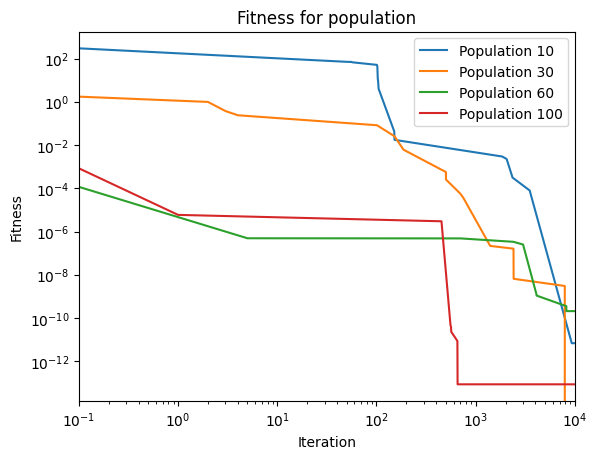

In [384]:
# Plot the results 0 to 3-> population
plot_results(
    data[0:4],
    "Fitness for population",
    labels=["Population 10", "Population 30", "Population 60", "Population 100"],
)

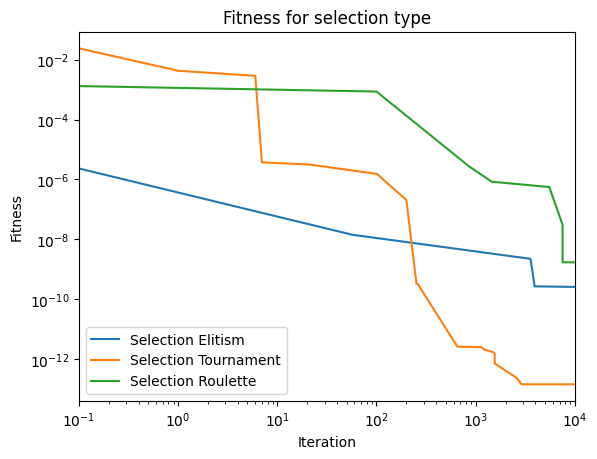

In [385]:
plot_results(
    data[4:7],
    "Fitness for selection type",
    labels=["Selection Elitism", "Selection Tournament", "Selection Roulette"],
)

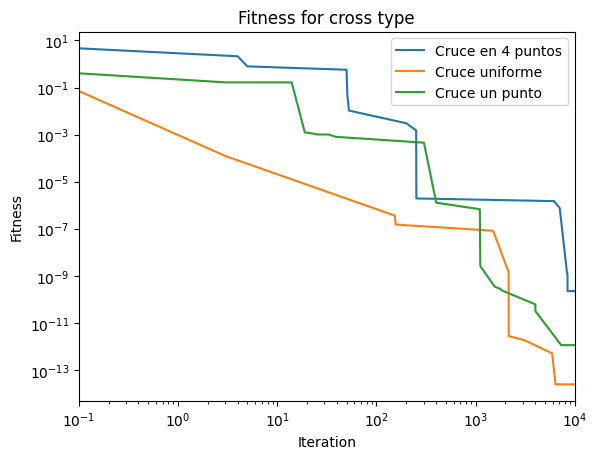

In [386]:
plot_results(
    data[7:10],
    "Fitness for cross type",
    labels=["Cruce en 4 puntos", "Cruce uniforme", "Cruce un punto"],
)

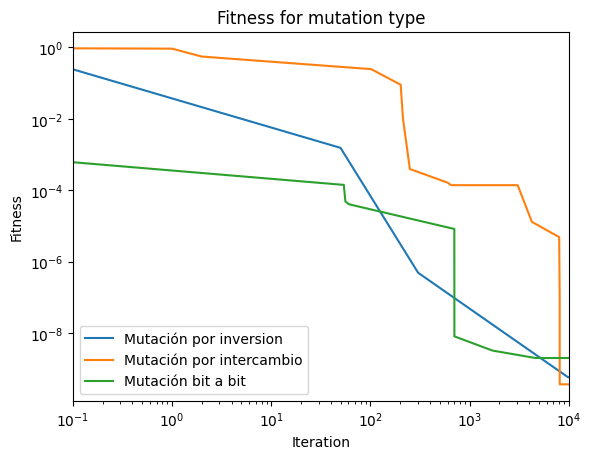

In [387]:
plot_results(
    data[10:13],
    "Fitness for mutation type",
    labels=["Mutación por inversion", "Mutación por intercambio", "Mutación bit a bit"],
)

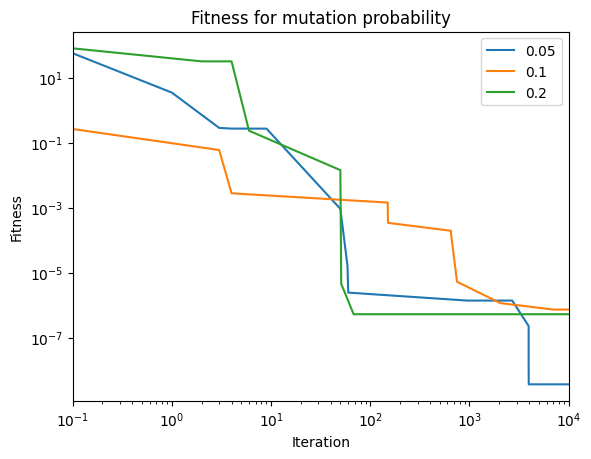

In [388]:
plot_results(
    data[13:16], "Fitness for mutation probability", labels=["0.05", "0.1", "0.2"]
)

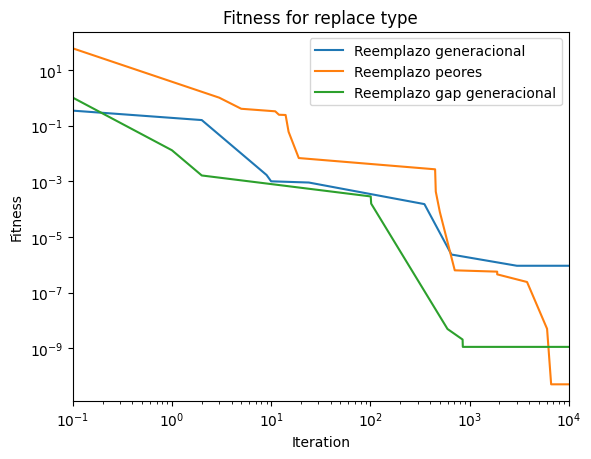

In [389]:
plot_results(
    data[16:19],
    "Fitness for replace type",
    labels=["Reemplazo generacional", "Reemplazo peores", "Reemplazo gap generacional"],
)

## Enfriamiento simulado

### Experiments

In [391]:
ex = Fenotype(numbersl, numbersr)

In [393]:
from GeneticAlgorithm.individuo import visualize_individuo

visualize_individuo(ex)

Left tree: 
                  __________________________________-_
                 /                                    \
      __________*____________________________         783
     /                                       \
   _/____               ______________________/_
  /      \             /                        \
651      _*_         _+____                     646
        /   \       /      \
      265   797   569      _+__________
                          /            \
                        544         ____+_
                                   /      \
                                 _*_      976
                                /   \
                              164   230

Right tree: 
                                               ____+_
                                              /      \
                                         ____*_      238
                                        /      \
                                   ____-_      988
                    

: 

In [264]:
"""run the enfriamiento simulado algorithm

        Args:
            temperature (float): initial temperature
            cooling_rate (float): cooling rate
            cooling_type (int): cooling type
            max_iterations (int): max iterations
            condition_stop (float): condition to stop
            n_neighbors (int): number of neighbors
            neighbors_type (int): neighbors type
            neighbor_side (int): neighbor side
            cooling_iterations (int, optional): cooling iterations. Defaults to None.
        
"""

tests = []
t = 1000
for cr, ct in [
    (1, 1),
    (0.9, 1),
    (0.99, 2),
    (0.95, 2),
    (0.9, 2),
    (0.1, 3),
    (0.05, 3),
    (5, 4),
    (10, 4),
    (20, 4),
]:
    tests.append((t, cr, ct, 10000, 0.0, 10, 0, 0, cr))
for n in [5, 10, 20]:
    tests.append((t, 0.95, 2, 10000, 0.0, n, 0, 0))
for nt in range(7):
    tests.append((t, 0.95, 2, 10000, 0.0, 10, nt, 0))
for ns in range(4):
    tests.append((t, 0.95, 2, 10000, 0.0, 10, 0, ns))

In [281]:
results = []
for t in tests:
    start = time.time()
    es = EnfriamientoSimulado(individual=ex)
    results.append(es.run(*t)[0])
    print(f"Time: {time.time()-start}")

Time: 4.380025148391724
Time: 5.65496301651001
Time: 37.818785429000854
Time: 38.43586707115173
Time: 61.00367569923401
Time: 45.29234194755554
Time: 59.45784878730774
Time: 5.698035001754761
Time: 4.9763710498809814
Time: 4.0507588386535645
Time: 28.875663995742798
Time: 49.83502531051636
Time: 43.062169790267944
Time: 39.05376052856445
Time: 63.82065415382385
Time: 67.61454486846924
Time: 48.288679122924805
Time: 61.86696457862854
Time: 60.2457480430603
Time: 45.8890016078949
Time: 45.637643337249756
Time: 56.01269793510437
Time: 57.70849609375
Time: 52.41287183761597


In [283]:
with open("resultsES.txt", "w") as f:
    for r in results:
        f.write(f"{r}\n")
        f.flush()

### Plots

In [355]:
with open("resultsES.txt", "r") as f:
    data = [line.strip() for line in f]

data = [ast.literal_eval(item) for item in data]

In [356]:
def plot_results(data, title, labels):
    x = []
    y = []
    for d in data:
        x_i = []
        y_i = []
        for it, fit in d:
            x_i.append(it)
            y_i.append(fit)
        x.append(x_i)
        y.append(y_i)

    for i in range(len(x)):
        x[i][0] = 0.1

    import matplotlib.pyplot as plt

    # make the y axis bigger near 0
    plt.yscale("log")
    plt.xscale("log")

    for i in range(len(x)):
        plt.plot(x[i], y[i], label=labels[i])
    # specify x range
    plt.xlim(0.1, 6000)
    # plot the legend on the botom left
    plt.legend(loc="lower left")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.show()

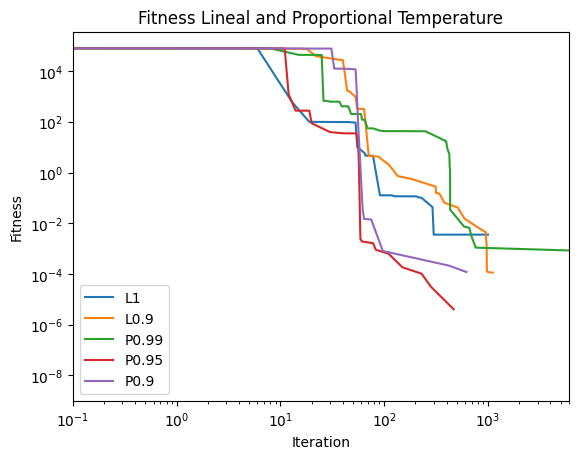

In [357]:
plot_results(
    data[:5],
    "Fitness Lineal and Proportional Temperature",
    labels=["L1", "L0.9", "P0.99", "P0.95", "P0.9"],
)

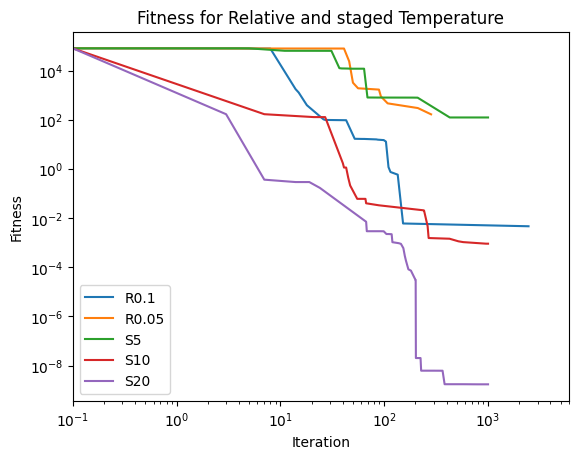

In [358]:
plot_results(
    data[5:10],
    "Fitness for Relative and staged Temperature",
    labels=["R0.1", "R0.05", "S5", "S10", "S20"],
)

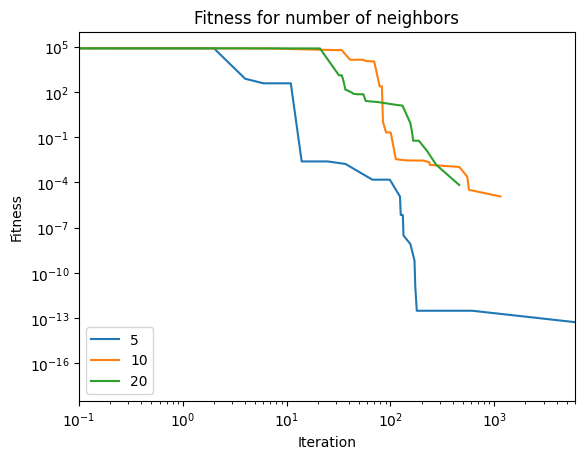

In [359]:
plot_results(data[10:13], "Fitness for number of neighbors", labels=["5", "10", "20"])

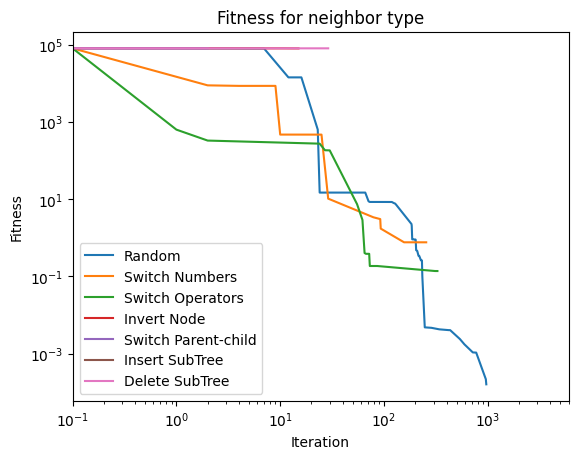

In [360]:
plot_results(
    data[13:20],
    "Fitness for neighbor type",
    labels=[
        "Random",
        "Switch Numbers",
        "Switch Operators",
        "Invert Node",
        "Switch Parent-child",
        "Insert SubTree",
        "Delete SubTree",
    ],
)

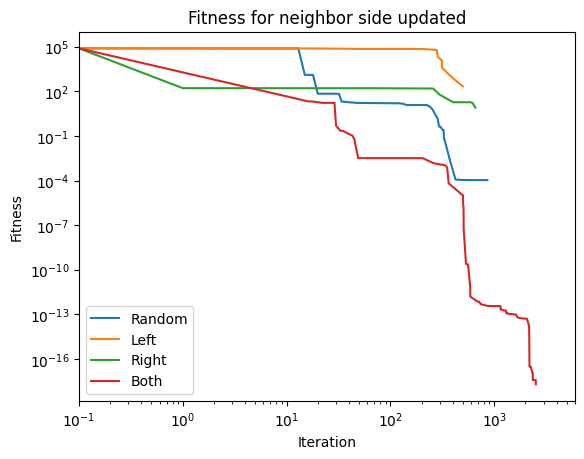

In [361]:
plot_results(
    data[20:24],
    "Fitness for neighbor side updated",
    labels=[
        "Random",
        "Left",
        "Right",
        "Both",
    ],
)

# comparativa

In [5]:
g = (30, 15, 15, 10000, 0.0, 50, 2, [3, 4], [0, 1, 2], 0.05, 3, 0.2, 3)
G = GeneticAlgorithm(lnumbers=numbersl, rnumbers=numbersr)
gresult = G.run(*g)

In [14]:
e = Fenotype(numbersl, numbersr)
e.compute_distance()

3.479559495564518

In [18]:
params = (10000, 20, 4, 10000, 0.0, 4, 0, 3, 20)
es = EnfriamientoSimulado(individual=e)
esresult = es.run(*params)

In [19]:
es_good = EnfriamientoSimulado(individual=gresult[1])
esresult_good = es_good.run(*params)

In [26]:
def plot_results(
    title="Comparativa Genetico, Enfriamiento Simulado",
    labels=[
        "Genetico",
        "Enfriamiento Simulado",
        "Enfriamiento Simulado desde Genetico",
    ],
):
    x = []
    y = []
    for d in [gresult[0]]:
        x_i = []
        y_i = []
        for fit, it in d:
            x_i.append(it)
            y_i.append(fit)
        x.append(x_i)
        y.append(y_i)
    for d in [esresult[0], esresult_good[0]]:
        x_i = []
        y_i = []
        for it, fit in d:
            x_i.append(it)
            y_i.append(fit)
        x.append(x_i)
        y.append(y_i)
    # for i in range(len(x)):
    #     x[i][0]=0.1

    # make the y axis bigger near 0
    plt.yscale("log")
    plt.xscale("log")

    for i in range(len(x)):
        plt.plot(x[i], y[i], label=labels[i])
    # specify x range
    plt.xlim(0.1, 10000)
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.show()

In [28]:
gresult[0]

[(2.4214413418386194, 0),
 (0.01200216443783967, 2),
 (0.005122962273603229, 3),
 (0.005122950857725057, 13),
 (0.005122939365741464, 21),
 (0.001032508974430497, 25),
 (0.0008561744895106974, 55),
 (0.0005468966132011098, 56),
 (0.00036197892656843965, 57),
 (0.0003601064289119413, 105),
 (6.8516502405635e-07, 201),
 (5.585949188398807e-07, 205),
 (4.553901523182394e-07, 207),
 (4.553299691936853e-07, 208),
 (4.537952181644408e-07, 211),
 (4.48642684642729e-07, 307),
 (3.3770408341656006e-07, 354),
 (8.391177160678283e-08, 357),
 (7.947114143256603e-08, 361),
 (2.8539752482019838e-08, 557),
 (5.865173884325613e-10, 559),
 (4.95630207938035e-10, 803),
 (3.042455098330461e-10, 1354),
 (2.149956445677147e-10, 1406),
 (2.1470846745067318e-10, 1457),
 (1.223926940960463e-10, 2006),
 (1.769311302754063e-11, 2009),
 (1.1832129059327034e-11, 2103),
 (1.1149202243256903e-11, 2154),
 (1.055390767895322e-11, 2156),
 (1.0226268595408068e-11, 2163),
 (4.295784347058271e-12, 2259),
 (1.677609300156

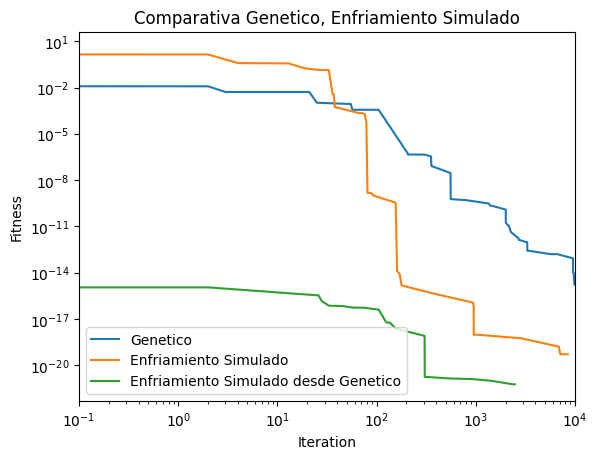

In [27]:
plot_results()